In [1]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145779&authkey=AHYqi-q2jYSmI5k"

--2019-05-15 16:47:59--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145779&authkey=AHYqi-q2jYSmI5k
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://lgojyq.am.files.1drv.com/y4mEY_3OZ_oCNFQAf3AMCvYVYJjs9rI3I8Hj1jHzRsgPOGskhBw9oW7VbUV-9kYZGZfIDsoRCRhp6wV0aSRF1WwNce4JZ-sWPn_FvqAi-lJ7rt1oLaGmFA5OA1iTTWDYMcqf3eYTBuAjeH9FPJndXu7zHTl_7I142pexZzydYd5vyj3-VqihrG0vHEKX2WZ8EF_p0eiiAj8RLalmI7QGqwIVQ/ALL_50K.zip?download&psid=1 [following]
--2019-05-15 16:48:00--  https://lgojyq.am.files.1drv.com/y4mEY_3OZ_oCNFQAf3AMCvYVYJjs9rI3I8Hj1jHzRsgPOGskhBw9oW7VbUV-9kYZGZfIDsoRCRhp6wV0aSRF1WwNce4JZ-sWPn_FvqAi-lJ7rt1oLaGmFA5OA1iTTWDYMcqf3eYTBuAjeH9FPJndXu7zHTl_7I142pexZzydYd5vyj3-VqihrG0vHEKX2WZ8EF_p0eiiAj8RLalmI7QGqwIVQ/ALL_50K.zip?download&psid=1
Resolving lgojyq.am.files.1drv.com (lgojyq.am.files.1drv.com)

In [0]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45779&authkey=AHYqi-q2jYSmI5k"

In [3]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import os


data_dir = './ALL_50K'
base_train_dir = os.path.join(data_dir, 'train')
base_test_dir = os.path.join(data_dir, 'test')


# Das CNN
# Das Model arbeitet sequentiell
# Aktivierungsfunktion kann ersetzt werden
# Die Anzahl der Neuronen der Layer kann verändert werden
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(60, 60, 3), use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu', use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten()) # "Abflachen" der Layer zu 1D
model.add(layers.Dense(10, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
# Auswahl der Loss-Function und des Optimizers
# binary_crossentropy muss bestehen bleiben, da binäres Problem
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 58, 58, 16)        432       
_________________________________________________________________
batch_normalization_1 (Batch (None, 58, 58, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        2304      
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
__________

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(featurewise_center=False, 
                                   samplewise_center=False,
                                   featurewise_std_normalization=False, 
                                   samplewise_std_normalization=False,
                                   zca_whitening=False, 
                                   zca_epsilon=1e-06, 
                                   rotation_range=180,
                                   width_shift_range=0.0, 
                                   height_shift_range=0.0, 
                                   brightness_range=None, 
                                   shear_range=0.0, 
                                   zoom_range=0.0, 
                                   channel_shift_range=0.0, 
                                   fill_mode='nearest', 
                                   cval=0.0, 
                                   horizontal_flip=False,
                                   vertical_flip=False,
                                   rescale=1./255,
                                   preprocessing_function=None, 
                                   data_format=None, 
                                   validation_split=0.0, 
                                   dtype=None)



test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        base_train_dir,
        target_size=(60, 60),
        batch_size=128,
        class_mode='binary'
        )

validation_generator = test_datagen.flow_from_directory(
        base_test_dir,
        target_size=(60, 60),
        batch_size=128,
        class_mode='binary'
        )

Found 43412 images belonging to 2 classes.
Found 11590 images belonging to 2 classes.


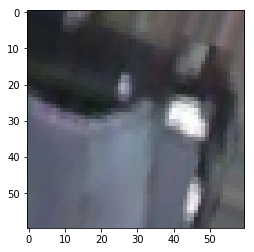

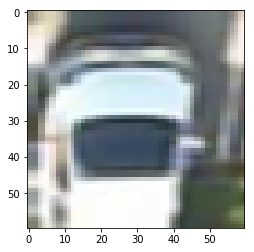

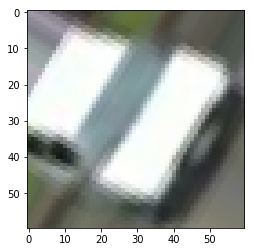

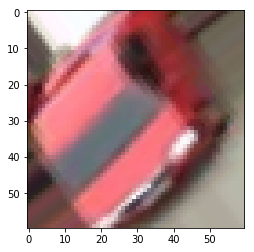

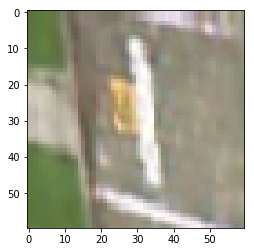

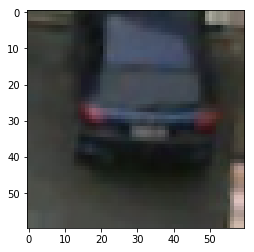

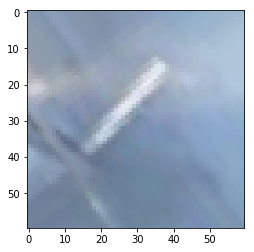

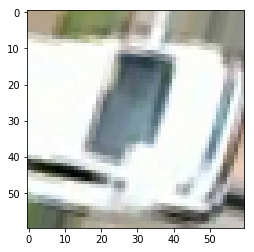

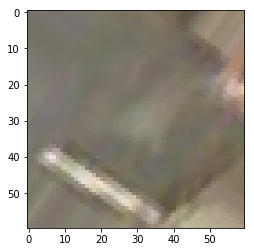

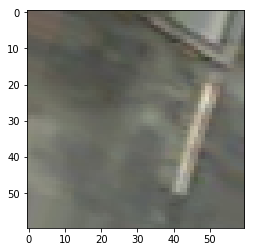

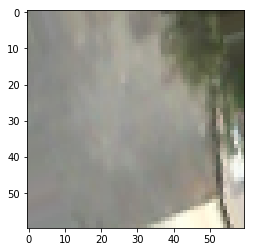

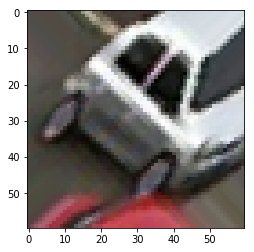

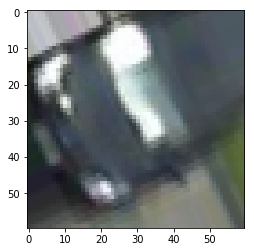

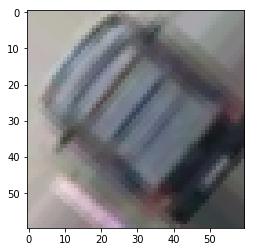

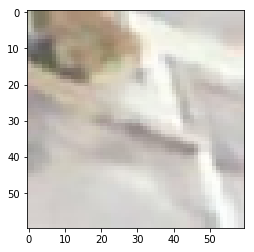

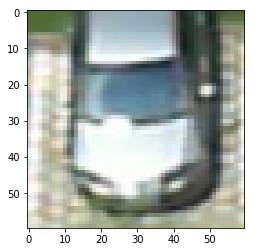

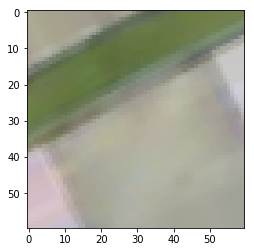

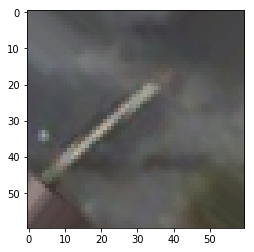

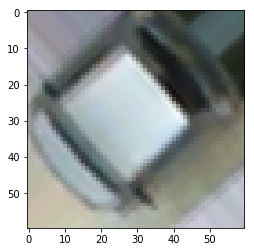

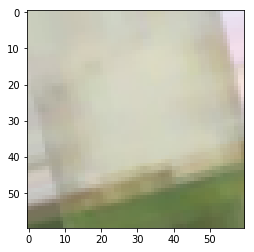

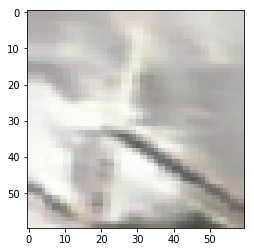

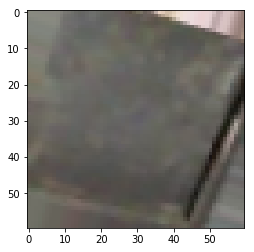

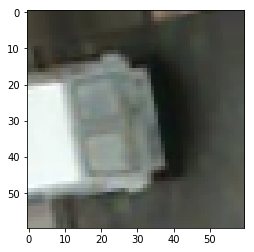

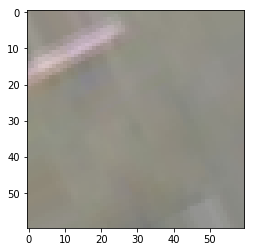

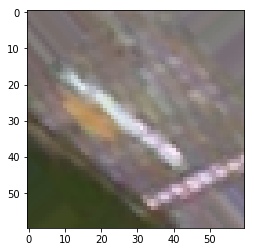

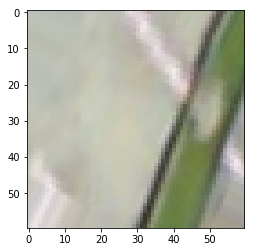

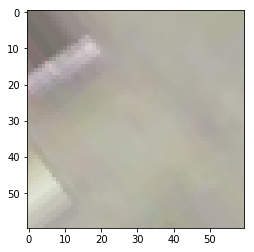

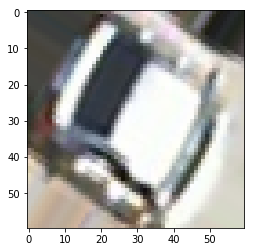

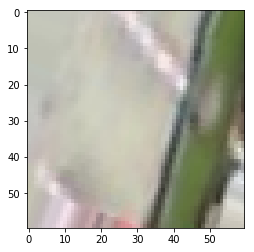

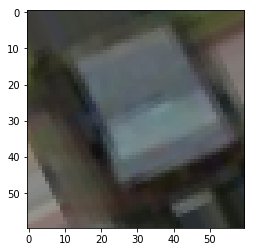

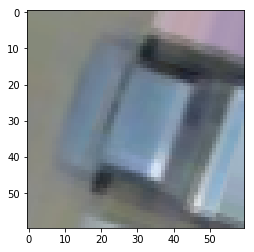

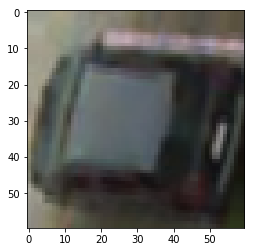

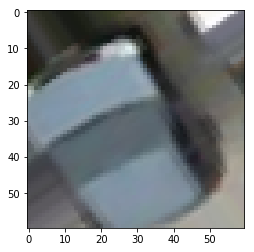

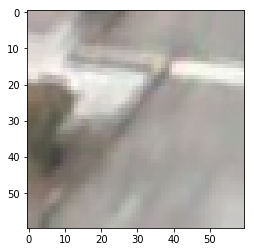

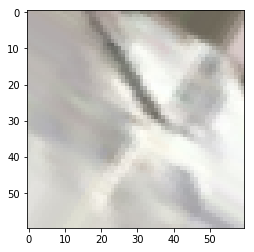

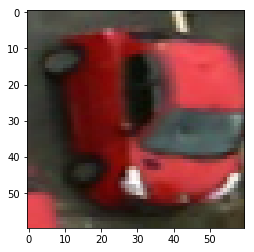

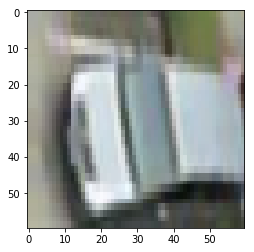

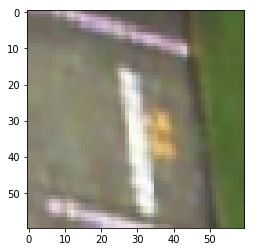

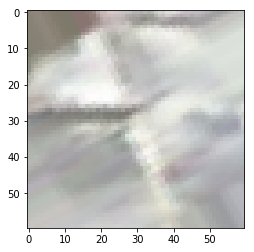

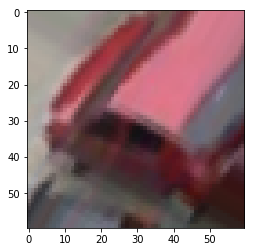

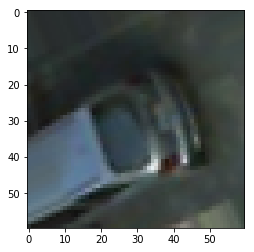

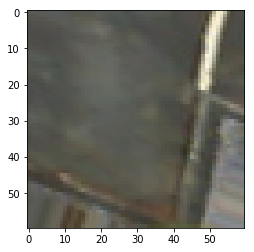

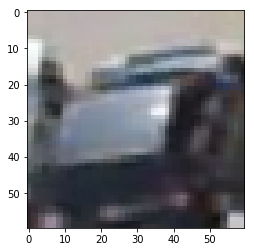

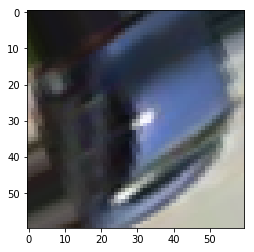

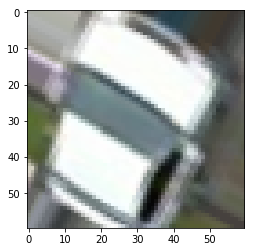

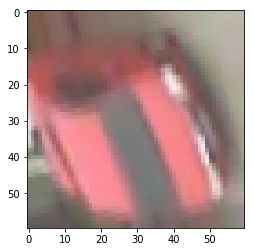

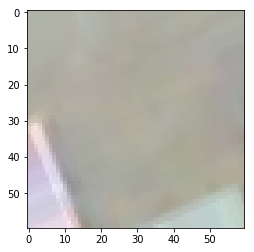

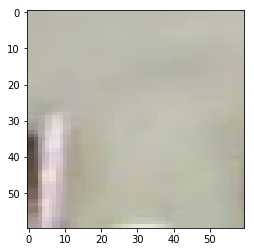

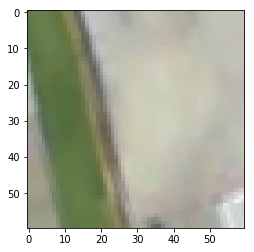

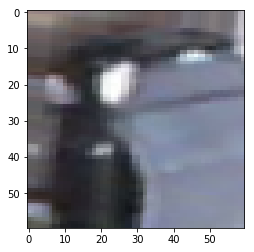

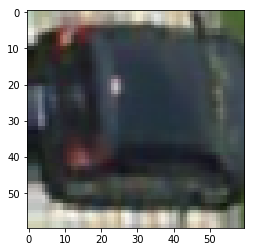

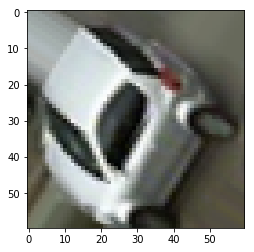

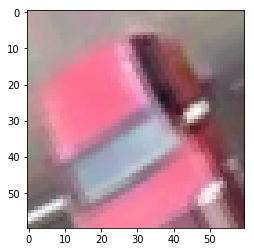

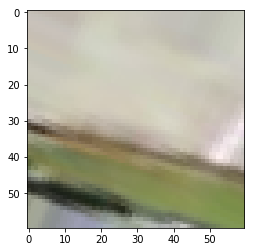

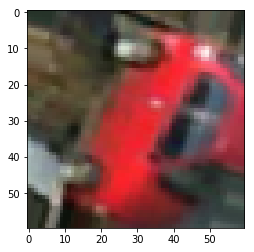

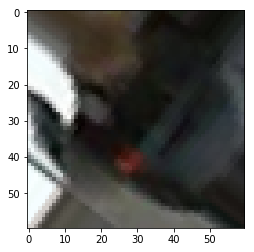

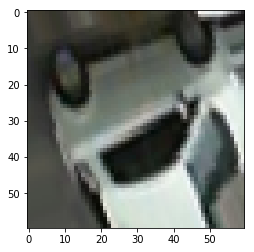

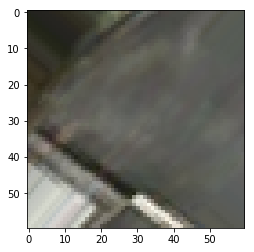

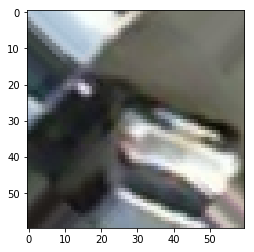

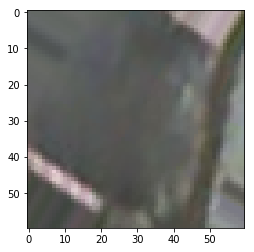

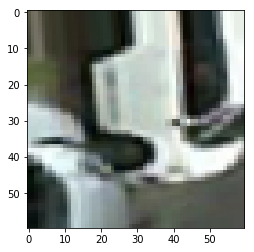

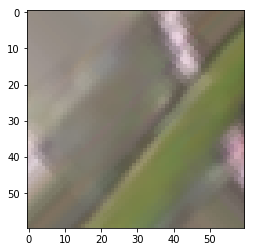

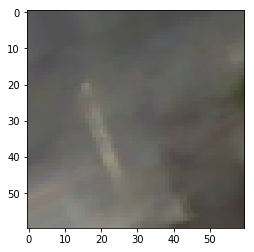

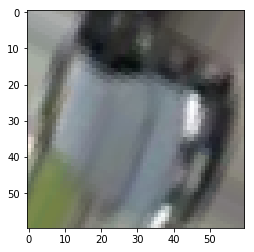

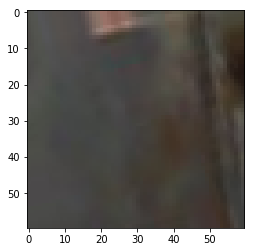

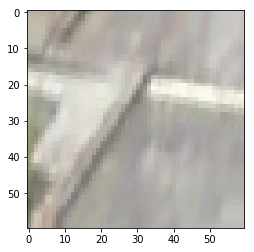

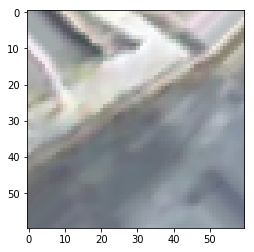

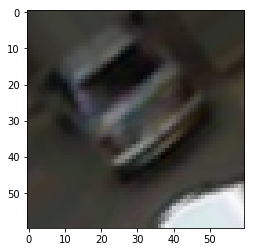

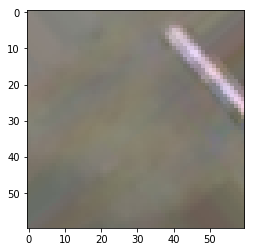

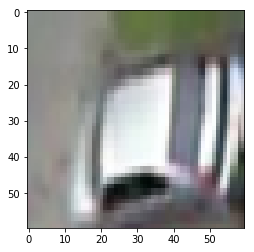

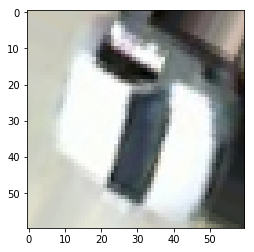

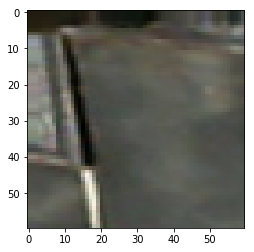

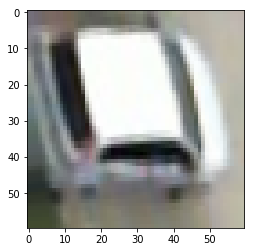

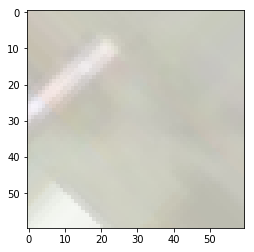

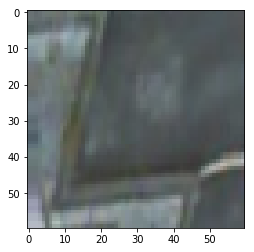

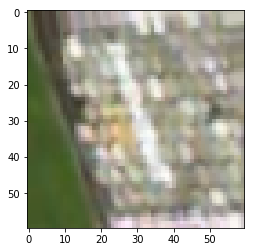

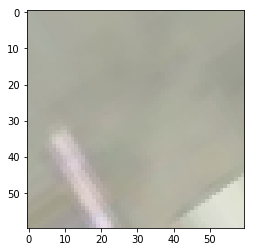

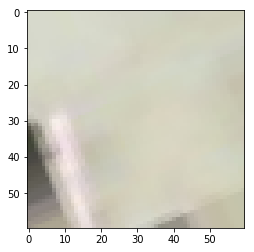

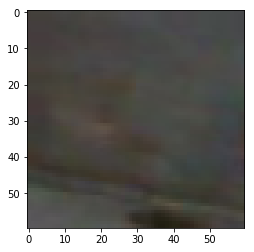

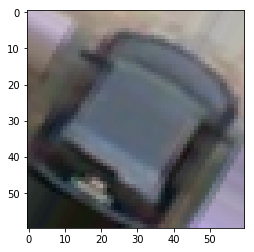

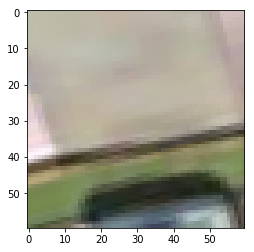

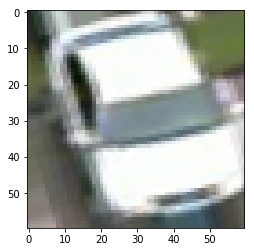

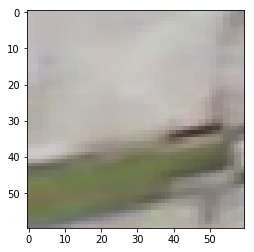

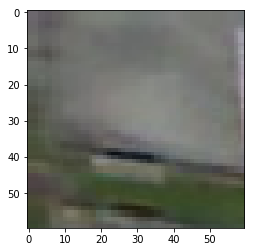

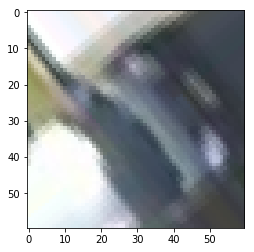

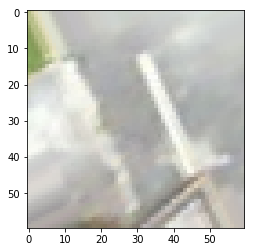

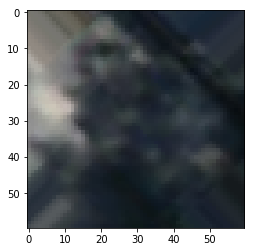

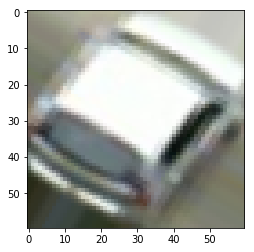

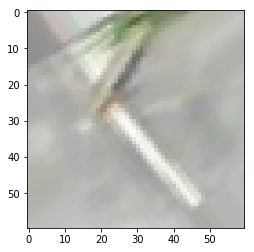

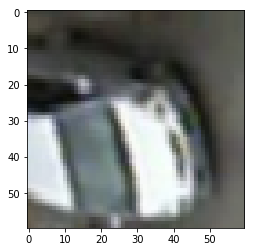

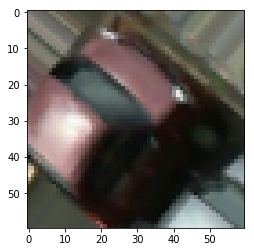

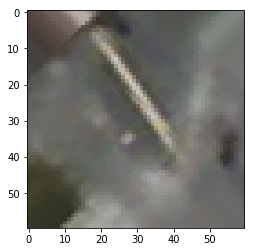

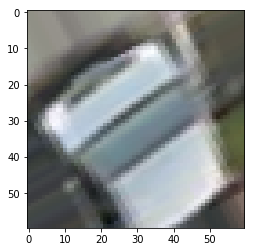

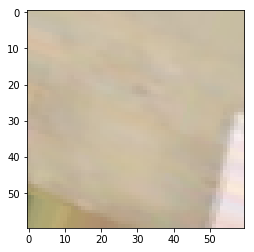

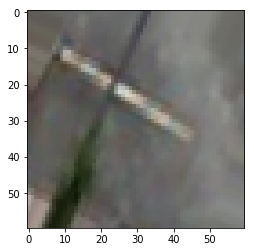

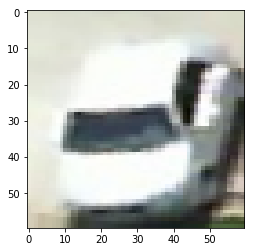

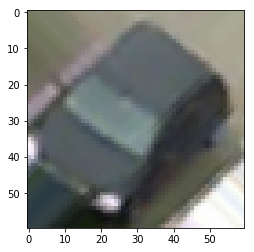

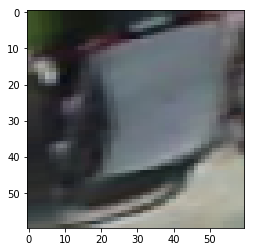

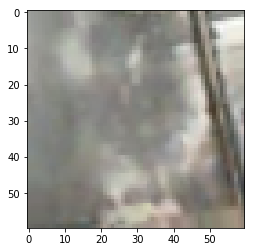

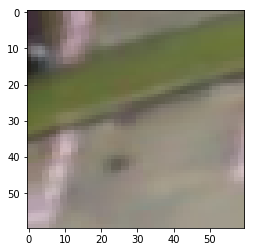

In [5]:
x_batch, y_batch = next(train_generator)

for i in range (0,128):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [6]:
from keras. callbacks import EarlyStopping

es = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True)

history = model.fit_generator(
                              train_generator,
                              steps_per_epoch=339, 
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=90, 
                              callbacks=[es]
                             )

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
339/339 [==============================] - 78s 229ms/step - loss: 0.0685 - acc: 0.9774 - val_loss: 0.0710 - val_acc: 0.9714
Epoch 2/100
339/339 [==============================] - 75s 221ms/step - loss: 0.0243 - acc: 0.9932 - val_loss: 0.1080 - val_acc: 0.9564
Epoch 3/100
339/339 [==============================] - 73s 214ms/step - loss: 0.0203 - acc: 0.9944 - val_loss: 0.0404 - val_acc: 0.9894
Epoch 4/100
339/339 [==============================] - 73s 215ms/step - loss: 0.0170 - acc: 0.9955 - val_loss: 0.2173 - val_acc: 0.9396
Epoch 5/100
339/339 [==============================] - 72s 211ms/step - loss: 0.0153 - acc: 0.9957 - val_loss: 0.2438 - val_acc: 0.9206
Epoch 6/100
339/339 [==============================] - 74s 219ms/step - loss: 0.0158 - acc: 0.9956 - val_loss: 0.1436 - val_acc: 0.9527
Epoch 7/100
339/339 [==============================] - 73s 215ms/step - loss: 0.0130 - acc: 0.9967 - val_loss: 0.1295 - val_acc: 0.9634


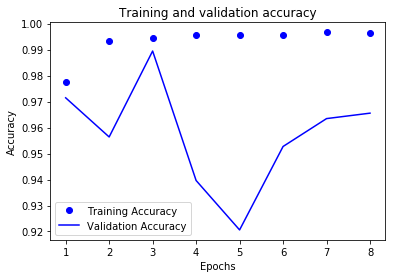

In [7]:
# Grafische (Verlaufs-)Darstellung des Loss

%matplotlib inline  

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" = Blauer Punkt
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# "b" = Blaue Linie
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [8]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145681&authkey=AIicdVtkBEkQgvU"

--2019-05-15 16:59:26--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145681&authkey=AIicdVtkBEkQgvU
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mwrg1q.am.files.1drv.com/y4m_1aMf5mnxPbiE4cC1NRQ5Khec6zgJ7iArmVn0bia5taVcRnypz_mEmgOcq4gJvvnBRsRKnaLGIxiTAO3RcdxzxJP-rZo0tIZr1q6FDxk1_aCKCtp-07Qk0vr6MwJOTb6eDhuwGFU5mQCKctWdXF3VQXtVKtPeCLiaD1CadlhweDNQhfQfqOcUBMTTAmNBQQnyRh1IwGOXRp0YrVed8Kd9w/CNR_TEST.zip?download&psid=1 [following]
--2019-05-15 16:59:26--  https://mwrg1q.am.files.1drv.com/y4m_1aMf5mnxPbiE4cC1NRQ5Khec6zgJ7iArmVn0bia5taVcRnypz_mEmgOcq4gJvvnBRsRKnaLGIxiTAO3RcdxzxJP-rZo0tIZr1q6FDxk1_aCKCtp-07Qk0vr6MwJOTb6eDhuwGFU5mQCKctWdXF3VQXtVKtPeCLiaD1CadlhweDNQhfQfqOcUBMTTAmNBQQnyRh1IwGOXRp0YrVed8Kd9w/CNR_TEST.zip?download&psid=1
Resolving mwrg1q.am.files.1drv.com (mwrg1q.am.files.1drv.co

In [0]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45681&authkey=AIicdVtkBEkQgvU"

In [10]:
temp = os.path.join("./CNR", 'test')

test_generator = test_datagen.flow_from_directory(
        temp,
        target_size=(60, 60),
        batch_size=200,
        class_mode='binary'
        )



model.evaluate_generator(test_generator,20)

Found 144965 images belonging to 2 classes.


[0.5089438408613205, 0.833749994635582]

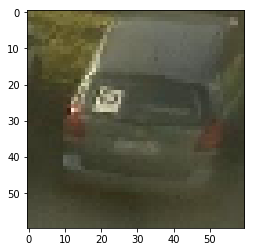

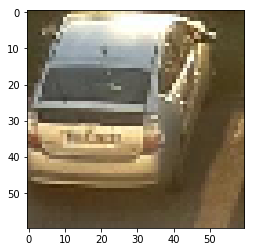

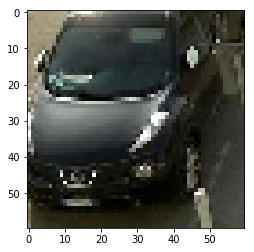

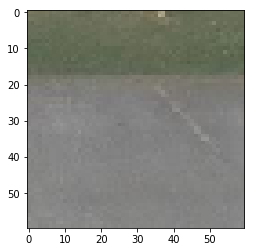

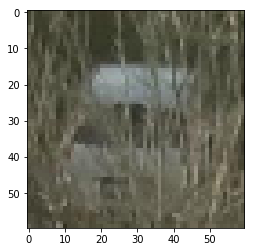

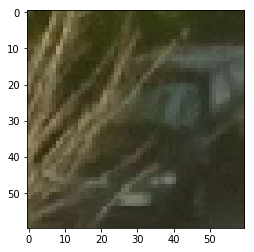

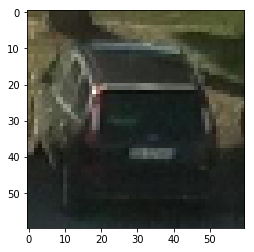

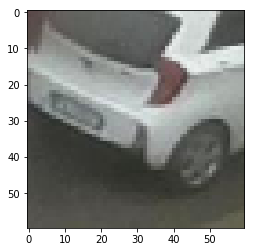

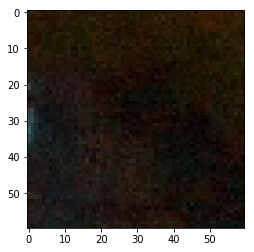

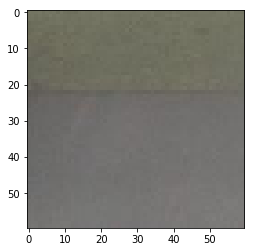

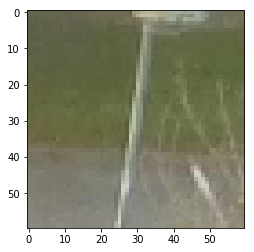

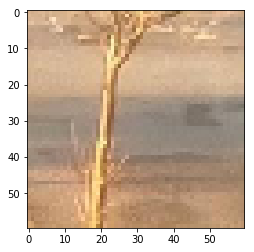

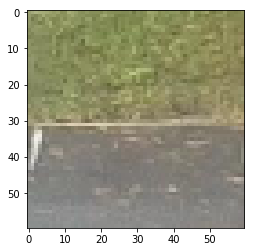

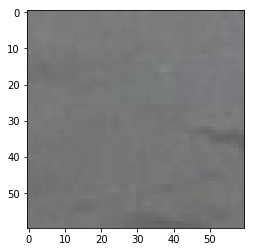

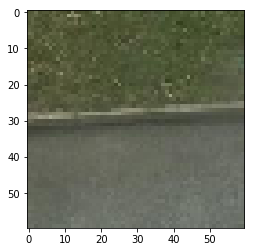

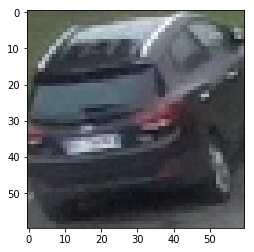

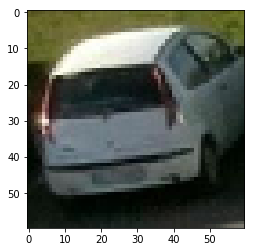

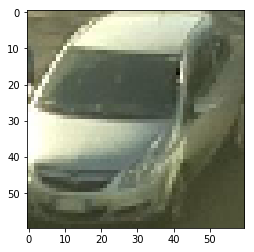

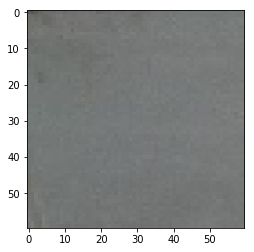

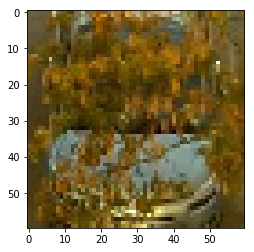

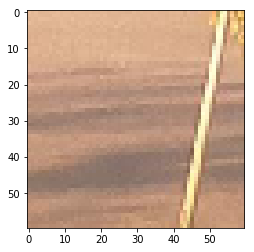

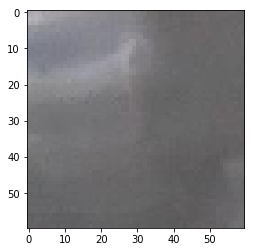

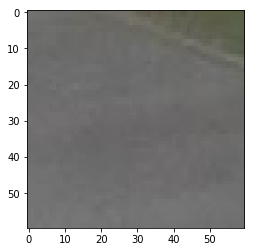

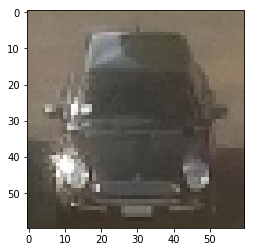

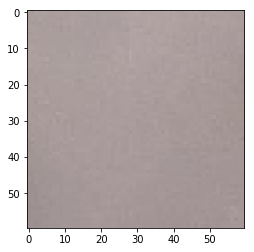

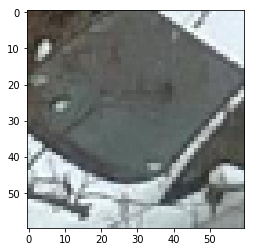

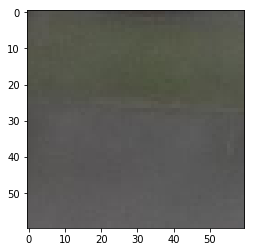

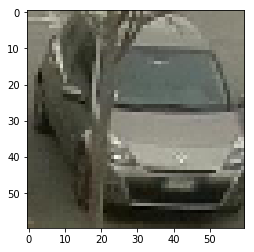

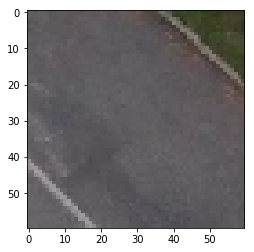

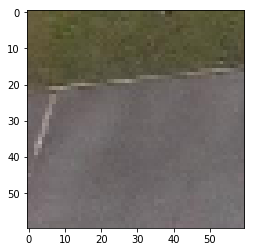

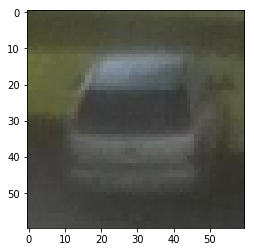

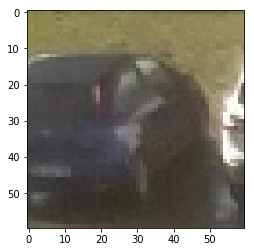

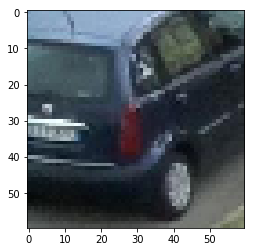

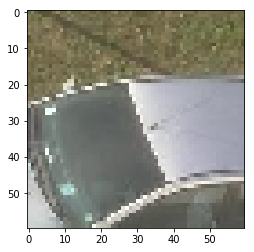

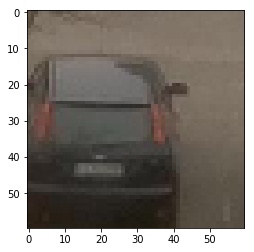

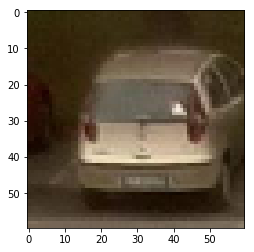

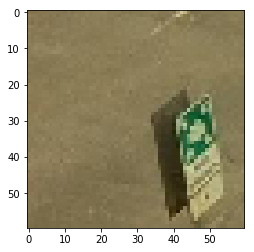

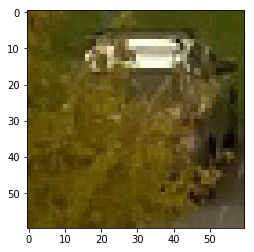

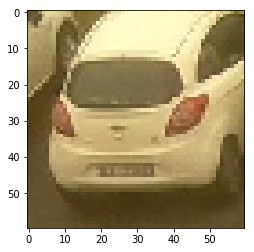

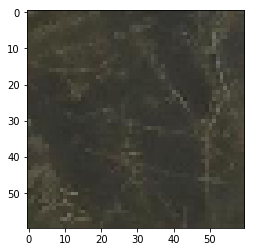

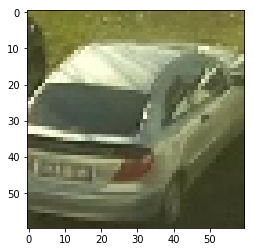

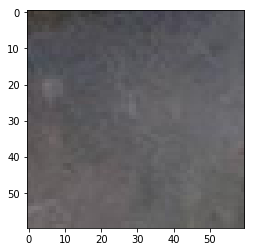

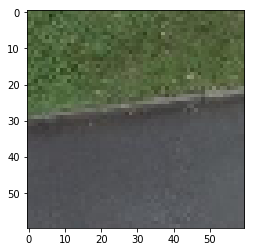

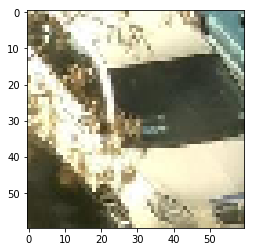

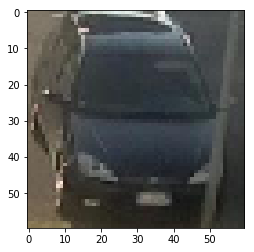

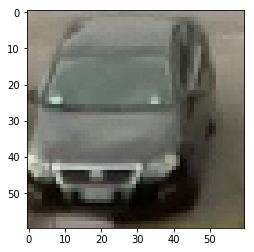

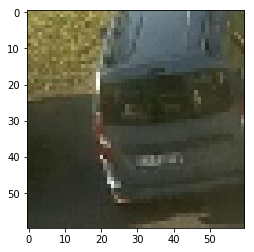

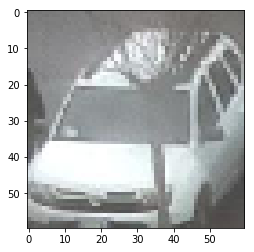

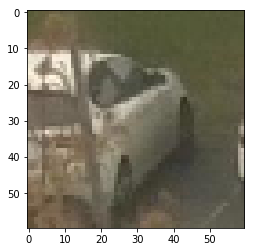

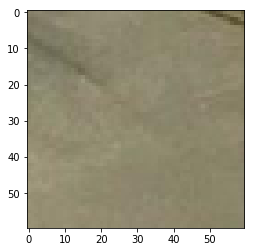

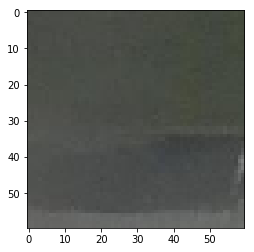

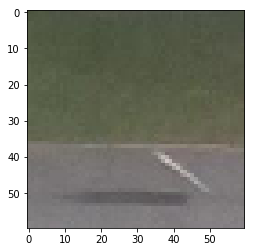

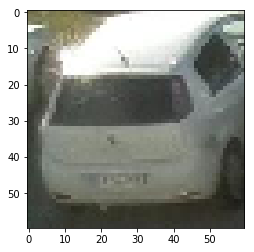

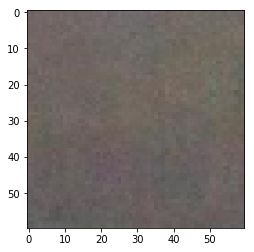

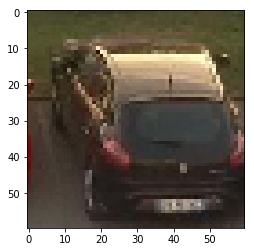

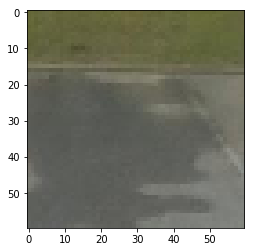

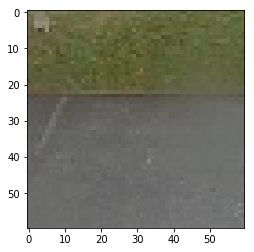

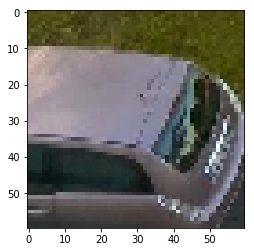

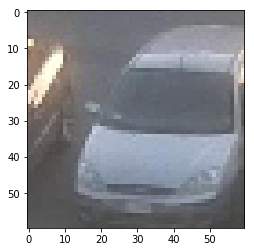

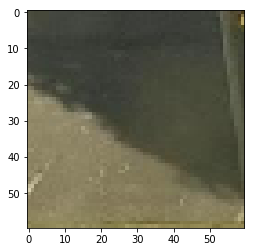

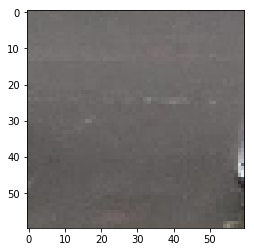

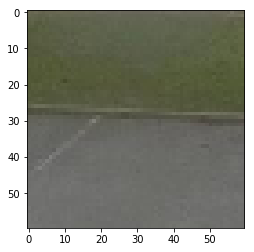

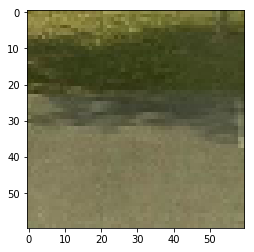

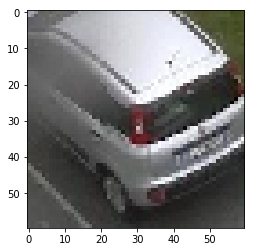

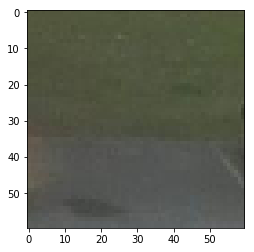

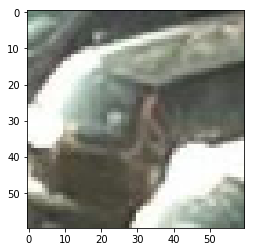

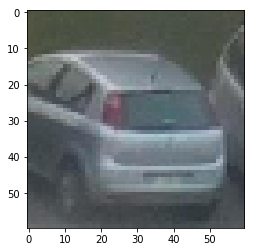

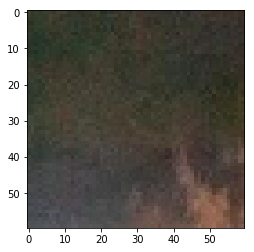

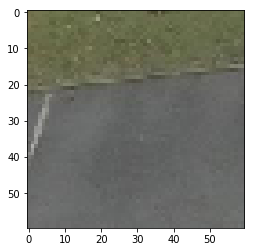

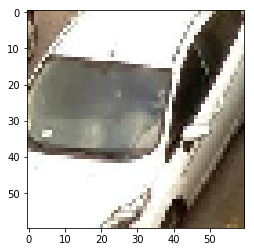

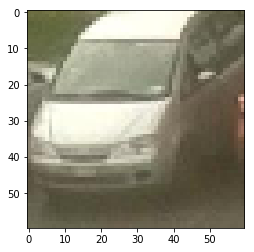

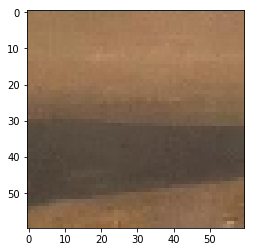

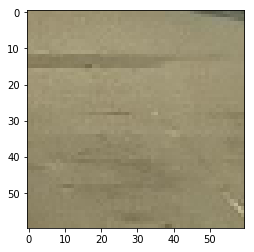

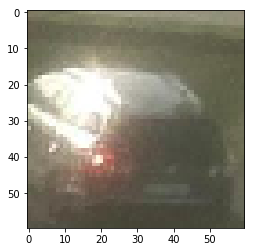

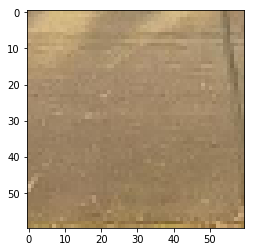

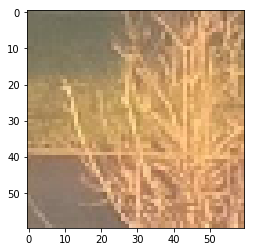

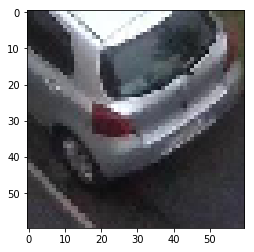

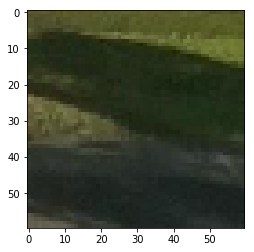

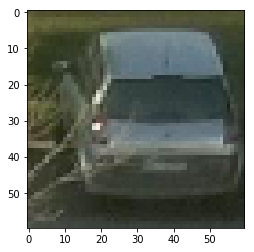

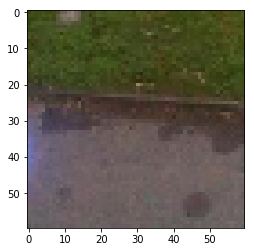

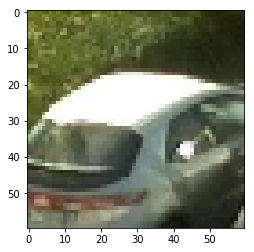

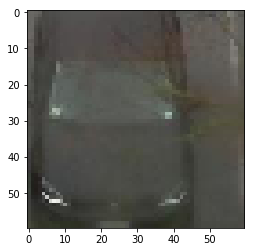

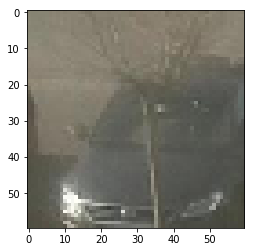

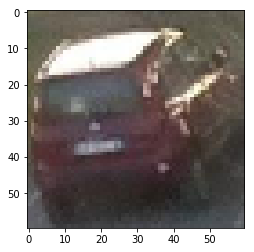

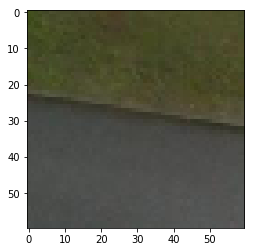

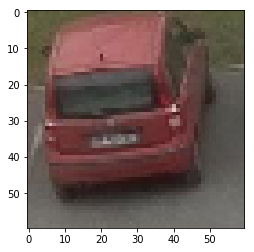

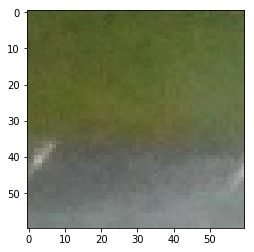

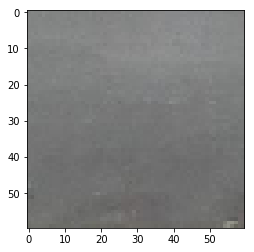

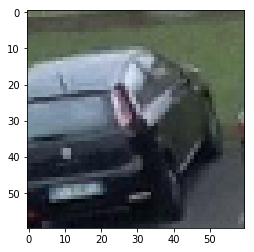

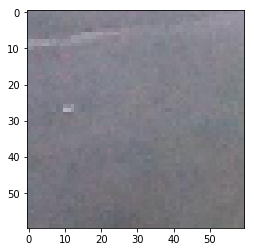

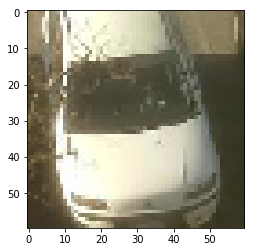

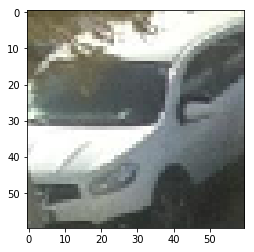

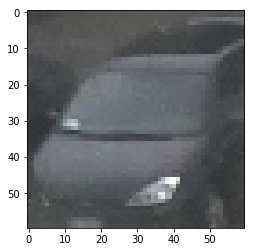

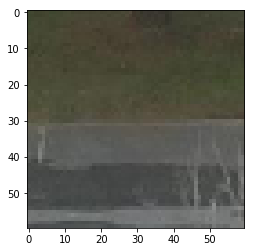

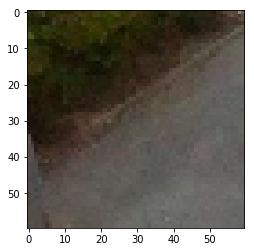

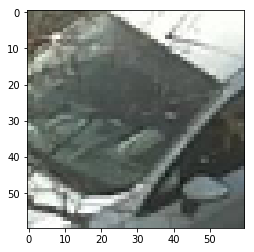

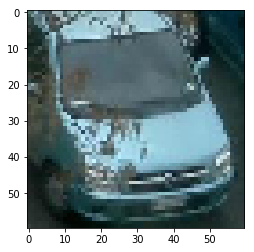

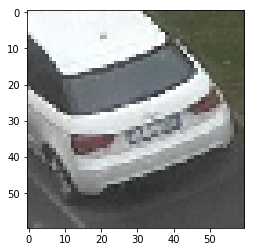

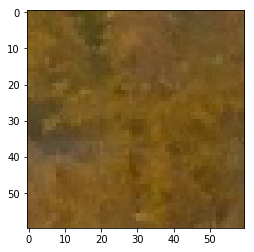

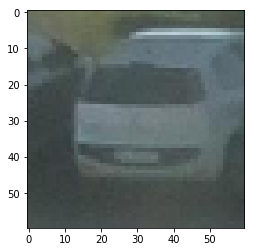

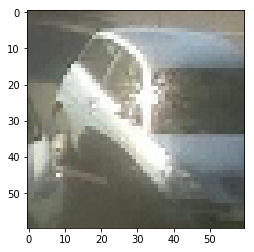

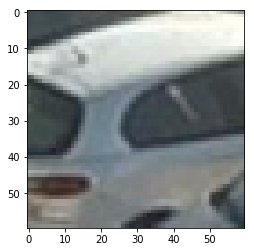

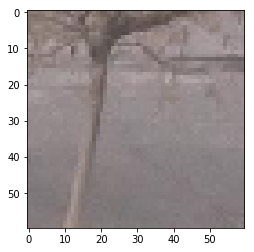

In [11]:
x_batch, y_batch = next(test_generator)

for i in range (0,128):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [15]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)


result = model.predict_generator(test_generator,20)
print(result[1])

[0.6155335]


In [40]:
print(result[20])
print(y_batch[20])

[0.00931653]
1.0
